In [154]:
import pandas as pd
import matplotlib.pyplot as plt

df_equipamentos= pd.read_excel("equipamentos_tratado.xlsx")
df_materiais= pd.read_excel("materiais.xlsx")
df_uso_equipamentos= pd.read_excel("uso_equipamentos.xlsx")

In [155]:
df_equipamentos['Parado'] = df_equipamentos['Status_atual'][df_equipamentos['Status_atual']== 'Parado']
df_equipamentos['Manutencao'] = df_equipamentos['Status_atual'][df_equipamentos['Status_atual']== 'Manutenção']
df_equipamentos


,Id_equipamento,Modelo,Setor,Status_atual,Tipo_manutencao,Data_manutencao,Tempo_parado_dias,Custo_manutencao,Parado,Manutencao
0,1,MOD-Wal,Embalagem,Operacional,Preventiva,04/07/2024,14,2849.43,NaN,NaN
1,2,MOD-PJi,Embalagem,Manutenção,NaN,NaN,8,2580.97,NaN,Manutenção
2,3,MOD-FGZ,Embalagem,Manutenção,Preventiva,NaN,11,639.41,NaN,Manutenção
3,4,MOD-YNZ,Logística,Operacional,NaN,22/11/2024,19,37163.20,NaN,NaN
4,5,MOD-pko,Embalagem,Parado,Corretiva,19/02/2025,3,219.79,Parado,NaN
5,6,MOD-aXZ,Logística,Parado,Corretiva,15/11/2024,4,38672.00,Parado,NaN
6,7,MOD-Kdw,Produção,Operacional,NaN,03/04/2025,8,3363.01,NaN,NaN
7,8,MOD-iJX,Logística,Manutenção,Corretiva,NaN,7,2705.37,NaN,Manutenção
8,9,MOD-aRW,Logística,Parado,Corretiva,NaN,14,2178.37,Parado,NaN
9,10,MOD-bnu,Produção,Parado,Preventiva,15/10/2024,4,1789.44,Parado,NaN


In [195]:
# Pergunta 1: quais equipamentos apresentam mais falhas ou manutenção corretiva?

media_tempo_parado_dias = df_equipamentos['Tempo_parado_dias'][(df_equipamentos['Tempo_parado_dias'] > 9.1) & (df_equipamentos['Tipo_manutencao'] == 'Corretiva')].mean()
media_tempo_parado_dias # 14 dias # Setor: Produção - Mercado= 4-6   //// Setor: Embalagem - Mercado 

falhas_manutencao_corretiva = df_equipamentos['Tempo_parado_dias'][(df_equipamentos['Tempo_parado_dias'] > 9.1) & (df_equipamentos['Tipo_manutencao'] == 'Corretiva')]
falhas_manutencao_corretiva = falhas_manutencao_corretiva.sort_values(ascending=False)
falhas_manutencao_corretiva.index = [48, 31, 50, 9, 18, 26, 45, 12, 11, 34]
falhas_manutencao_corretiva

48    20
31    19
50    14
9     14
18    14
26    13
45    13
12    13
11    11
34    10
Name: Tempo_parado_dias, dtype: int64

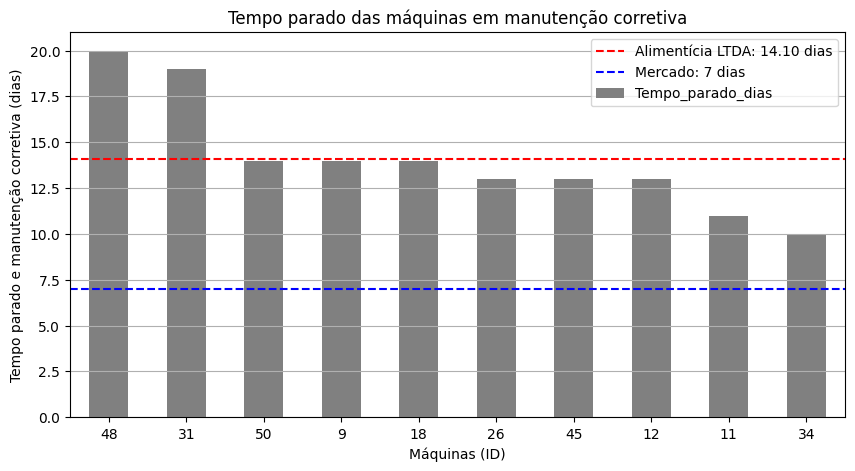

In [196]:
plt.figure(figsize=(10,5))
falhas_manutencao_corretiva.plot(kind="bar", color='gray')
plt.title("Tempo parado das máquinas em manutenção corretiva")
plt.xlabel("Máquinas (ID)")
plt.ylabel("Tempo parado e manutenção corretiva (dias)") 
plt.xticks(rotation=0)
plt.axhline(media_tempo_parado_dias, color='red', linestyle='--', label=f'Alimentícia LTDA: {media_tempo_parado_dias:.2f} dias')
plt.axhline(7, color='blue', linestyle='--', label=f'Mercado: 7 dias')
plt.legend()
plt.grid(axis="y")
plt.show()

In [192]:
# Custo

media_custo = df_equipamentos['Custo_manutencao'][(df_equipamentos['Tempo_parado_dias'] > 9.1) & (df_equipamentos['Tipo_manutencao'] == 'Corretiva')].mean()
media_custo # R$ 1984 Mercado: 2000 - 5000 # Setor: Produção - Mercado= 4-6   //// Setor: Embalagem - Mercado 

falhas_manutencao_corretiva = df_equipamentos['Custo_manutencao'][(df_equipamentos['Tempo_parado_dias'] > 9.1) & (df_equipamentos['Tipo_manutencao'] == 'Corretiva')]
falhas_manutencao_corretiva.index = [ 9, 11, 12, 18, 26, 31, 34, 45, 48, 50]
falhas_manutencao_corretiva = falhas_manutencao_corretiva.sort_values(ascending=False)
falhas_manutencao_corretiva

34    4620.98
45    2915.67
48    2238.46
9     2178.37
18    2002.15
12    1997.12
50    1739.13
31    1290.53
11     683.62
26     183.19
Name: Custo_manutencao, dtype: float64

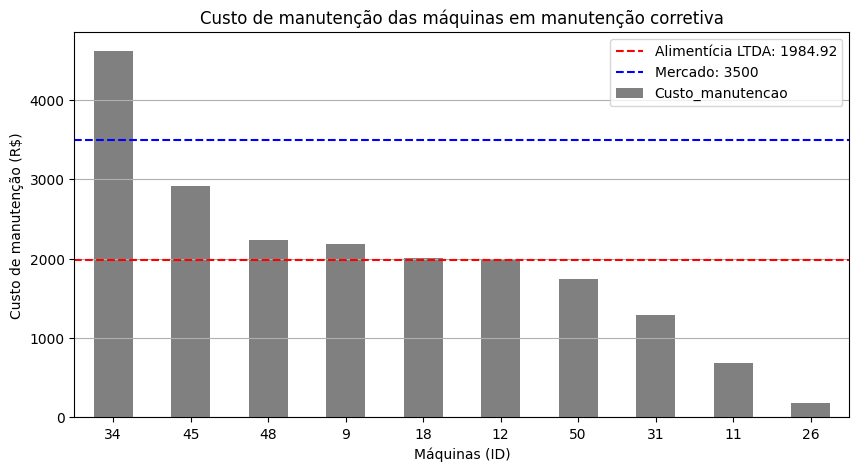

In [193]:
plt.figure(figsize=(10,5))
falhas_manutencao_corretiva.plot(kind="bar", color="gray")
plt.title("Custo de manutenção das máquinas em manutenção corretiva")
plt.xlabel("Máquinas (ID)")
plt.ylabel("Custo de manutenção (R$)") 
plt.xticks(rotation=0)
plt.axhline(media_custo, color='red', linestyle='--', label=f'Alimentícia LTDA: {media_custo:.2f}')
plt.axhline(3500, color='blue', linestyle='--', label=f'Mercado: 3500')
plt.legend()
plt.grid(axis="y")
plt.show()

In [160]:
# Pergunta 2: Existem padrões de desgaste por tipo de uso de material?

media_de_uso = df_materiais['Quantidade_uso'].mean()
media_de_uso # 25

padroes_desgaste = df_materiais.groupby(['Setor_uso'])['Quantidade_uso'].mean().sort_values(ascending=False)

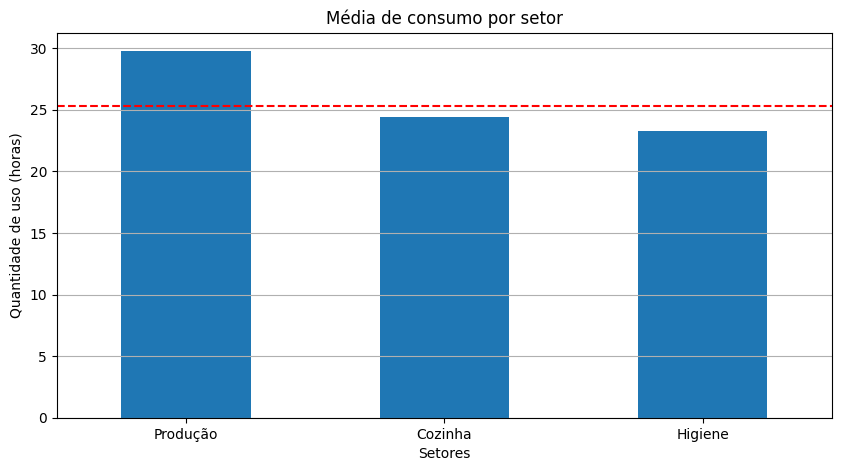

In [161]:
plt.figure(figsize=(10,5))
padroes_desgaste.plot(kind="bar")
plt.title("Média de consumo por setor")
plt.xlabel("Setores")
plt.ylabel("Quantidade de uso (horas)") 
plt.xticks(rotation=0)
plt.axhline(media_de_uso, color='red', linestyle='--', label=f'Média: {media_tempo_parado_dias:.2f}')
plt.grid(axis="y")
plt.show()

In [162]:
# Pergunta 3: Como o consumo de materiais varia entre filiais ou turnos?

